In [98]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from functions import Read_data 
from functions import fix_set_poverty_member
from functions import rep_null_val
from functions import replace_yes_no
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
import warnings
pd.pandas.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [99]:
# write a function to show distribution and outlier plots for variable in pandas data frame 

In [100]:
income_train_df=Read_data('train.csv')

In [101]:
def pipeline(df):
    df1=replace_yes_no(df)
    df2=rep_null_val(df)
    df3=fix_set_poverty_member(df)
    return df3
def find_value_count(df):
    return 

In [102]:
income_train_df=pipeline(income_train_df)

In [103]:
Square_variables = [x for x in income_train_df if x.startswith('SQB')]

Removing Square variables 

In the dataset, we remove squared variables (i.e., variables that are squared or raised to a power greater than 1) from the analysis for several reasons:

Interpretability: When we square a variable, the resulting squared variable becomes difficult to interpret. For example, if we square the age variable, the resulting variable age^2 represents the square of the age, which is not as easy to interpret as the original age variable. In other words, squared variables can be harder to explain in practical terms.

Multicollinearity: Squared variables can often be highly correlated with their original variable. For example, the age variable and the age^2 variable are likely to be highly correlated, which can lead to multicollinearity issues in the regression model. Multicollinearity can make it difficult to interpret the coefficients of the regression model and can lead to unstable estimates.

Overfitting: Including squared variables can sometimes lead to overfitting, which means that the model is fitting the noise in the data rather than the underlying signal. This can result in a model that performs well on the training data but poorly on new data.

In [104]:
income_train_df.drop(Square_variables,axis=1,inplace=True)

In [105]:
income_train_df.drop('agesq',inplace=True,axis=1)

In [106]:
float_columns=income_train_df.select_dtypes('float').columns.tolist()
int_columns=income_train_df.select_dtypes('int').columns.tolist()
object_columns=income_train_df.select_dtypes('object').columns.tolist()

In [107]:
#continous 
#categorical
#encoding 
#numerical distribution ,outlier 

In [108]:
nominal_cols=['rooms','r4h1','r4h3','r4m1','r4m2','r4m3','r4t1','r4t2']
yes_no=['hacdor','hacapo','v14a','refrig','v18q','r4h2']

In this we performs an initial data exploration and classifies the columns (variables) into four categories based on the number of unique values (nunique) they contain:

garbage_col: These are columns with only one unique value, which provide no useful information for the analysis. They are considered garbage columns and will be removed from the analysis.

yes_no_columns:['hacdor','hacapo','v14a','refrig','v18q','r4h2'] These are columns with only two unique values, which are often binary variables (e.g., 0/1, True/False). These variables are typically treated as categorical variables with two categories and are often useful in modeling.

nominal_cols:['rooms','r4h1','r4h3','r4m1','r4m2','r4m3','r4t1','r4t2'] These are columns with more than two unique values, but less than or equal to 38 unique values. These columns are considered nominal categorical variables, which have no intrinsic ordering or hierarchy among their categories. These variables are often encoded using one-hot encoding for modeling.

continous_cols:['age', 'v2a1'] These are columns with more than 38 unique values, and are considered continuous variables. These variables can take on any value within a range, and are often used in regression and other modeling techniques that assume a continuous distribution.

This categorization of variables is useful for gaining an initial understanding of the dataset and can be used to guide subsequent analysis and modeling. For example, the different types of variables may require different preprocessing and feature engineering steps, and may be used in different types of models.

In [109]:
yes_no_columns=[]
nominal_cols=[]
continous_cols=[]
garbage_col=[]
for i in int_columns+float_columns:
    if  income_train_df[i].nunique()==1:
        garbage_col.append(i)
    elif income_train_df[i].nunique()==2:
        yes_no_columns.append(i)
    elif income_train_df[i].nunique()>2 and income_train_df[i].nunique()<=38:
        nominal_cols.append(i)
    else:
        continous_cols.append(i)

In [110]:
# continous columns 
print(f"We have {len(continous_cols)} continous columns the name of the columns are as follows:")
print(continous_cols)

We have 2 continous columns the name of the columns are as follows:
['age', 'v2a1']


#   Continous Variable

We creates a Pandas DataFrame that summarizes the descriptive statistics (count, mean, standard deviation, minimum value, 25th percentile, 75th percentile and maximum value) of the continuous variables (i.e., age and v2a1). The .T method is used to transpose the summary statistics table, and the .reset_index() method is used to reset the index to integers.

The resulting table shows that there are 9557 non-null values for both age and v2a1 variables. The mean age of individuals in the dataset is 34.30 years, with a standard deviation of 21.61 years. The minimum age is 0 years, and the maximum age is 97 years. The mean monthly rent payment (v2a1) is 46628.61, with a standard deviation of 109167.15. There are households that do not pay any rent (0.0), and the maximum monthly rent is 2353477.0.

The scatter plot shows a clear and positive correlation between v2a1 and age, then it indicate that older people tend to pay higher rent, or that as people get older, they tend to move into larger and more expensive homes. 

This analysis provides a quick overview of the distribution and range of the continuous variables in the dataset. It can help identify outliers, missing values, or potential data quality issues that may need further investigation before modeling.

In [111]:
#Univariate continous analysis 

In [112]:

pd.DataFrame((income_train_df[continous_cols].describe().T).reset_index())

,index,count,mean,std,min,25%,50%,75%,max
0,age,9557.0,34.303547,21.612261,0.0,17.0,31.0,51.0,97.0
1,v2a1,9557.0,46628.611908,109167.146196,0.0,0.0,0.0,45000.0,2353477.0


[]

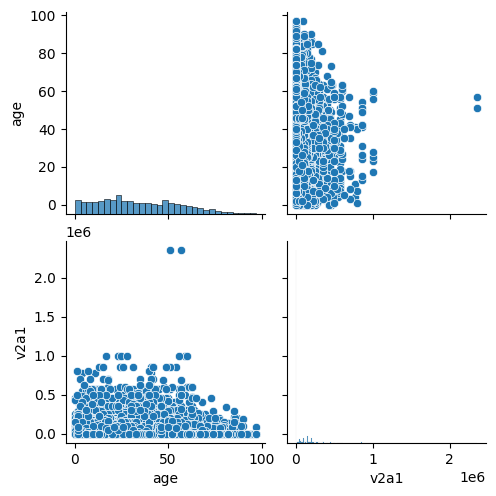

In [113]:
sns.pairplot(income_train_df[continous_cols])
plt.plot()

We are creating a bivariate analysis plot for the continuous variables. The plot shows three subplots, each with a different continuous variable. 

The first plot shows the mean age for each value of the target variable. 

The second plot shows the mean monthly rent for each value of the target variable. 

The third plot shows the mean of the average years of education for each value of the target variable.

In [114]:
#Continous variable Bivariate analysis with target variable 
#*ANNOVA TEST 

In [115]:
continous_cols

['age', 'v2a1']

Age
v2a1: Monthly Rent 
meaneduc:Average Year of education 18+

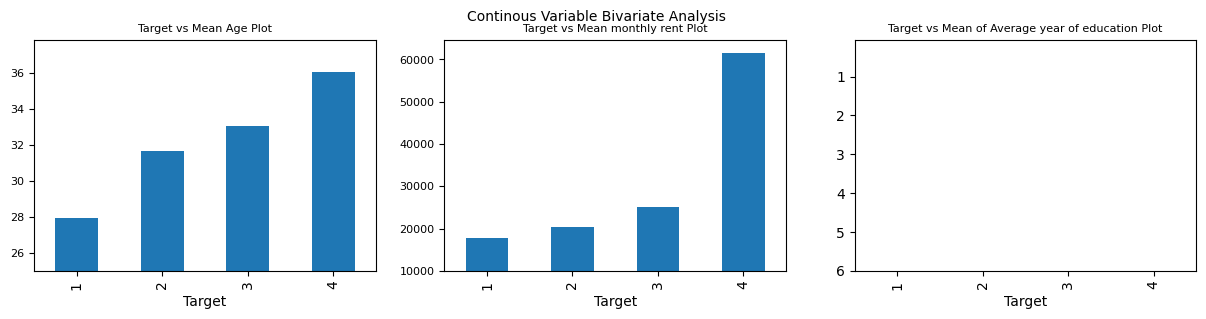

In [116]:
fig = plt.figure(figsize=(15,3))
fig.suptitle('Continous Variable Bivariate Analysis',fontsize=10)
plt.subplot(1, 3, 1)
income_train_df.groupby('Target')['age'].mean().plot(kind='bar')
plt.ylim(25)
plt.yticks(fontsize=8)
plt.xticks(fontsize=10)
plt.title("Target vs Mean Age Plot",fontsize=8)
plt.subplot(1, 3, 2)
income_train_df.groupby('Target')['v2a1'].mean().plot(kind='bar')
plt.ylim(10000)
plt.yticks(fontsize=8)
plt.xticks(fontsize=10)
plt.title("Target vs Mean monthly rent Plot",fontsize=8)
plt.subplot(1, 3, 3)
income_train_df.groupby('Target')['meaneduc'].mean().plot(kind='bar')
plt.ylim(6)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title("Target vs Mean of Average year of education Plot",fontsize=8)
plt.show()


##### Target Variable 
  - 1 : Extreme Poverty
  - 2 : Moderate Poverty
  - 3 : Vulnerable Households
  - 4 : Non-vulnerable Households

Inference

We performs the chi-square test for independence between a categorical variable (columns) and the target variable ('Target') in a given DataFrame (df).

The function compares the computed p-value with a predefined significance level (alpha=0.05). If the p-value is less than or equal to the significance level, the function prints 'Dependent (Reject H0) Variable is Significant', indicating that the categorical variable is significantly associated with the target variable. Otherwise, the function prints 'Independent (Accept H0) Variable is not Significant', indicating that the categorical variable is not significantly associated with the target variable.

This function can be used to perform hypothesis testing on the categorical variables in our dataset.
From chi-square test we select the variable which is significant(i.e, 'r4h1', 'r4m1', 'r4t1', 'escolari', 'hogar_nin', 'rez_esc', 'dependency', 'edjefe', 'edjefa')


Nominal Columns 

In [117]:
len(nominal_cols)

26

In [118]:
def chisq(df,columns):
    target='Target'
    col_name=columns 
    for i in col_name:
        stat, p, dof, expected = chi2_contingency(df[[i,f"{target}"]])
        alpha = 0.05
        print("\n")
        print("**************************************************************************************************************")
        print(f"Dependent Variable {i} \n Independent Variable {target}")
        print(f"P-Value {p} \n DOF {dof} \n Threshold {alpha}")
        print("p value is " + str(p))
        if p <= alpha:
            print('Dependent (Reject H0) Variable is Significant')
        else:
            print('Independent (Accept H0) Variable is not Significant')    
    

In [119]:
#nominal_cols_status=
chisq(income_train_df,nominal_cols)



**************************************************************************************************************
Dependent Variable rooms 
 Independent Variable Target
P-Value 1.0 
 DOF 9556 
 Threshold 0.05
p value is 1.0
Independent (Accept H0) Variable is not Significant


**************************************************************************************************************
Dependent Variable r4h1 
 Independent Variable Target
P-Value 4.526683632465941e-07 
 DOF 9556 
 Threshold 0.05
p value is 4.526683632465941e-07
Dependent (Reject H0) Variable is Significant


**************************************************************************************************************
Dependent Variable r4h2 
 Independent Variable Target
P-Value 1.0 
 DOF 9556 
 Threshold 0.05
p value is 1.0
Independent (Accept H0) Variable is not Significant


**************************************************************************************************************
Dependent Variable r4h3 
 Independ

In [120]:
select_Cols_nominal=['r4h1', 'r4m1', 'r4t1', 'escolari', 'hogar_nin', 'rez_esc', 'dependency', 'edjefe', 'edjefa']

pivot table can be used to analyze the relationship between the poverty level and slect_col_nominals
i.e significant variable.

The table shows the count of households, categorized by the significant variable ('r4h1', 'r4m1', 'r4t1', 'escolari', 'hogar_nin', 'rez_esc', 'dependency', 'edjefe', 'edjefa'), for each target category. The target categories are represented by the values 1, 2, 3, and 4.

For example, there are 394 households in the target category 1 that have 0 males under 12 years of age (r4h1=0), and there are 441 households in the target category 2 that have 1 male under 12 years of age (r4h1=1). The table can be used to investigate the relationship between the target category and the number of males under 12 years of age in the household.

In [121]:
pd.pivot_table(income_train_df,values='Id',index='Target',columns='r4h1',aggfunc='count').fillna(0)

r4h1,0,1,2,3,4,5
Target,,,,,,
1,394.0,219.0,126.0,12.0,10.0,13.0
2,909.0,441.0,181.0,27.0,0.0,0.0
3,825.0,316.0,74.0,0.0,6.0,0.0
4,4590.0,1165.0,226.0,14.0,0.0,9.0


In [122]:
pd.pivot_table(income_train_df,values='Id',index='Target',columns='r4m1',aggfunc='count').fillna(0)

r4m1,0,1,2,3,4,6
Target,,,,,,
1,364.0,218.0,147.0,45.0,0.0,0.0
2,932.0,402.0,165.0,34.0,16.0,9.0
3,785.0,348.0,68.0,20.0,0.0,0.0
4,4557.0,1234.0,201.0,12.0,0.0,0.0


In [123]:
pd.pivot_table(income_train_df,values='Id',index='Target',columns='r4t1',aggfunc='count').fillna(0)

r4t1,0,1,2,3,4,5,7
Target,,,,,,,
1,228.0,176.0,185.0,98.0,42.0,32.0,13.0
2,598.0,416.0,320.0,159.0,40.0,16.0,9.0
3,546.0,402.0,210.0,42.0,21.0,0.0,0.0
4,3618.0,1570.0,689.0,107.0,11.0,0.0,9.0


In [124]:
pd.pivot_table(income_train_df,values='Id',index='Target',columns='escolari',aggfunc='count').fillna(0)

escolari,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
Target,,,,,,,,,,,,,,,,,,,,,,
1,199.0,38.0,46.0,51.0,44.0,42.0,143.0,40.0,43.0,31.0,13.0,59.0,10.0,5.0,4.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0
2,307.0,65.0,70.0,106.0,75.0,83.0,371.0,91.0,83.0,92.0,35.0,119.0,27.0,8.0,11.0,6.0,5.0,4.0,0.0,0.0,0.0,0.0
3,200.0,37.0,56.0,69.0,46.0,53.0,305.0,74.0,71.0,78.0,44.0,121.0,24.0,17.0,11.0,11.0,1.0,3.0,0.0,0.0,0.0,0.0
4,601.0,107.0,146.0,175.0,141.0,168.0,1166.0,283.0,301.0,411.0,205.0,824.0,235.0,169.0,290.0,360.0,188.0,192.0,8.0,9.0,4.0,21.0


In [125]:
pd.pivot_table(income_train_df,values='Id',index='Target',columns='hogar_nin',aggfunc='count').fillna(0)

hogar_nin,0,1,2,3,4,5,6,7,8,9
Target,,,,,,,,,,
1,132.0,159.0,177.0,140.0,79.0,48.0,7.0,0.0,19.0,13.0
2,306.0,300.0,393.0,342.0,142.0,22.0,44.0,9.0,0.0,0.0
3,248.0,324.0,339.0,224.0,49.0,25.0,12.0,0.0,0.0,0.0
4,2311.0,1746.0,1369.0,404.0,125.0,40.0,0.0,9.0,0.0,0.0


In [127]:
pd.pivot_table(income_train_df,values='Id',index='Target',columns='dependency',aggfunc='count').fillna(0)

dependency,0.000000,0.166667,0.200000,0.222222,0.250000,0.285714,0.333333,0.400000,0.500000,0.600000,0.666667,0.714286,0.750000,0.800000,0.833333,1.000000,1.200000,1.250000,1.333333,1.500000,1.666667,1.750000,2.000000,2.250000,2.500000,3.000000,3.500000,4.000000,5.000000,6.000000,8.000000
Target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,81.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,93.0,0.0,25.0,0.0,7.0,0.0,0.0,138.0,0.0,0.0,7.0,90.0,8.0,0.0,132.0,13.0,28.0,56.0,0.0,35.0,12.0,7.0,26.0
2,104.0,0.0,0.0,0.0,20.0,0.0,44.0,7.0,156.0,0.0,80.0,0.0,42.0,9.0,0.0,398.0,0.0,9.0,7.0,205.0,0.0,11.0,237.0,0.0,7.0,104.0,9.0,25.0,12.0,0.0,72.0
3,86.0,7.0,18.0,0.0,30.0,0.0,76.0,14.0,179.0,8.0,55.0,0.0,21.0,9.0,11.0,341.0,0.0,0.0,21.0,149.0,0.0,0.0,84.0,0.0,14.0,20.0,0.0,10.0,0.0,0.0,68.0
4,1476.0,0.0,72.0,11.0,210.0,9.0,462.0,63.0,1069.0,0.0,327.0,12.0,28.0,0.0,0.0,1315.0,11.0,9.0,49.0,269.0,0.0,0.0,277.0,0.0,28.0,56.0,9.0,30.0,0.0,0.0,212.0


In [128]:
pd.pivot_table(income_train_df,values='Id',index='Target',columns='edjefe',aggfunc='count').fillna(0)

edjefe,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0
Target,,,,,,,,,,,,,,,,,,,,,,
1,462.0,19.0,37.0,53.0,10.0,6.0,94.0,27.0,20.0,10.0,3.0,27.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,703.0,34.0,50.0,78.0,30.0,61.0,352.0,34.0,22.0,77.0,12.0,82.0,0.0,8.0,0.0,0.0,9.0,6.0,0.0,0.0,0.0,0.0
3,451.0,16.0,37.0,50.0,31.0,58.0,295.0,25.0,37.0,68.0,16.0,56.0,17.0,8.0,16.0,21.0,5.0,14.0,0.0,0.0,0.0,0.0
4,2146.0,54.0,70.0,126.0,66.0,97.0,1104.0,148.0,178.0,331.0,80.0,586.0,96.0,87.0,188.0,262.0,120.0,182.0,19.0,14.0,7.0,43.0


Inference

Grouping the income_train_df dataframe by 'Target' and  slect_col_nominals i.e significant variable and counting the number of 'Id' occurrences for each group.
Creating four separate dataframes for each target group by filtering out the rows that match the respective target values.

Fo example: calculate the percentage of males under 12 years old in each poverty level, which is plotted in each of the four subplots. The y-axis represents the percentage of males under 12 years old, and the x-axis represents the number of males under 12 years old in a household. The title of each subplot describes the poverty level being analyzed.

In [129]:
meles12=pd.DataFrame((income_train_df.groupby(['Target','r4h1'])['Id'].count()).reset_index())

For each poverty level, we are creating a bar chart of the percentage of households with a certain number of males younger than 12 years old. The four poverty levels are Extreme Poverty, Moderate Poverty, Vulnerable House Hold, and Non-Vulnerable House Hold.

In r4h1 we saw that there is a relationship between the number of males under the age of 12 and the target category.Specifically, the number of males under the age of 12 is lower in non-vulnerable households, and higher in extreme poverty. This could suggest that the number of males under the age of 12 could be a predictor of the target category.

In [130]:
meles12_1=meles12[meles12['Target']==1]
meles12_1.columns=['Target','r4h1','Per of pop']
meles12_1['Per of pop']=meles12_1['Per of pop'].apply(lambda x:round(x/774*100,2))
meles12_1=meles12_1.set_index('r4h1')
meles12_2=meles12[meles12['Target']==2]
meles12_2.columns=['Target','r4h1','Per of pop']
meles12_2['Per of pop']=meles12_2['Per of pop'].apply(lambda x:round(x/1558*100,2))
meles12_2=meles12_2.set_index('r4h1')

meles12_3=meles12[meles12['Target']==3]
meles12_3.columns=['Target','r4h1','Per of pop']
meles12_3['Per of pop']=meles12_3['Per of pop'].apply(lambda x:round(x/1221*100,2))
meles12_3=meles12_3.set_index('r4h1')

meles12_4=meles12[meles12['Target']==4]
meles12_4.columns=['Target','r4h1','Per of pop']
meles12_4['Per of pop']=meles12_4['Per of pop'].apply(lambda x:round(x/6004*100,2))
meles12_4=meles12_4.set_index('r4h1')


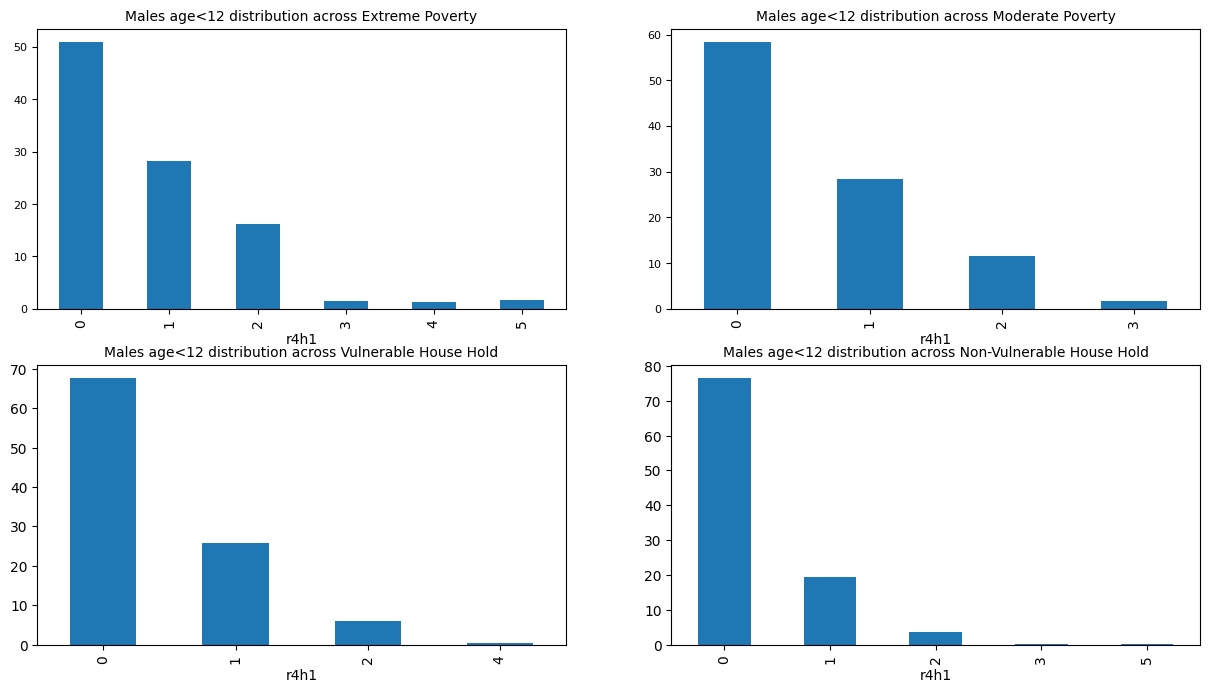

In [131]:
#visualization of the distribution of r4h1 across different poverty levels
fig = plt.figure(figsize=(15,8))
#fig.suptitle('Continous Variable Bivariate Analysis',fontsize=10)
plt.subplot(2, 2, 1)
meles12_1['Per of pop'].plot(kind='bar')
plt.yticks(fontsize=8)
plt.xticks(fontsize=10)
plt.title("Males age<12 distribution across Extreme Poverty",fontsize=10)
plt.subplot(2, 2, 2)
meles12_2['Per of pop'].plot(kind='bar')
plt.yticks(fontsize=8)
plt.xticks(fontsize=10)
plt.title("Males age"+"<12 distribution across Moderate Poverty",fontsize=10)
plt.subplot(2, 2, 3)
meles12_3['Per of pop'].plot(kind='bar')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title("Males age<12 distribution across Vulnerable House Hold",fontsize=10)
plt.subplot(2, 2, 4)
meles12_4['Per of pop'].plot(kind='bar')
plt.title("Males age<12 distribution across Non-Vulnerable House Hold",fontsize=10)
plt.show()

In r4m1 we saw that there is a relationship between the number of females under the age of 12 and the target category. Specifically, the number of females under the age of 12 is lower in non-vulnerable households, and higher in extreme poverty. This could suggest that the number of females under the age of 12 could be a predictor of the target category.

In [132]:
meles12=pd.DataFrame((income_train_df.groupby(['Target','r4m1'])['Id'].count()).reset_index())

meles12_1=meles12[meles12['Target']==1]
meles12_1.columns=['Target','r4m1','Per of pop']
meles12_1['Per of pop']=meles12_1['Per of pop'].apply(lambda x:round(x/774*100,2))
meles12_1=meles12_1.set_index('r4m1')
meles12_2=meles12[meles12['Target']==2]
meles12_2.columns=['Target','r4m1','Per of pop']
meles12_2['Per of pop']=meles12_2['Per of pop'].apply(lambda x:round(x/1558*100,2))
meles12_2=meles12_2.set_index('r4m1')

meles12_3=meles12[meles12['Target']==3]
meles12_3.columns=['Target','r4m1','Per of pop']
meles12_3['Per of pop']=meles12_3['Per of pop'].apply(lambda x:round(x/1221*100,2))
meles12_3=meles12_3.set_index('r4m1')

meles12_4=meles12[meles12['Target']==4]
meles12_4.columns=['Target','r4m1','Per of pop']
meles12_4['Per of pop']=meles12_4['Per of pop'].apply(lambda x:round(x/6004*100,2))
meles12_4=meles12_4.set_index('r4m1')

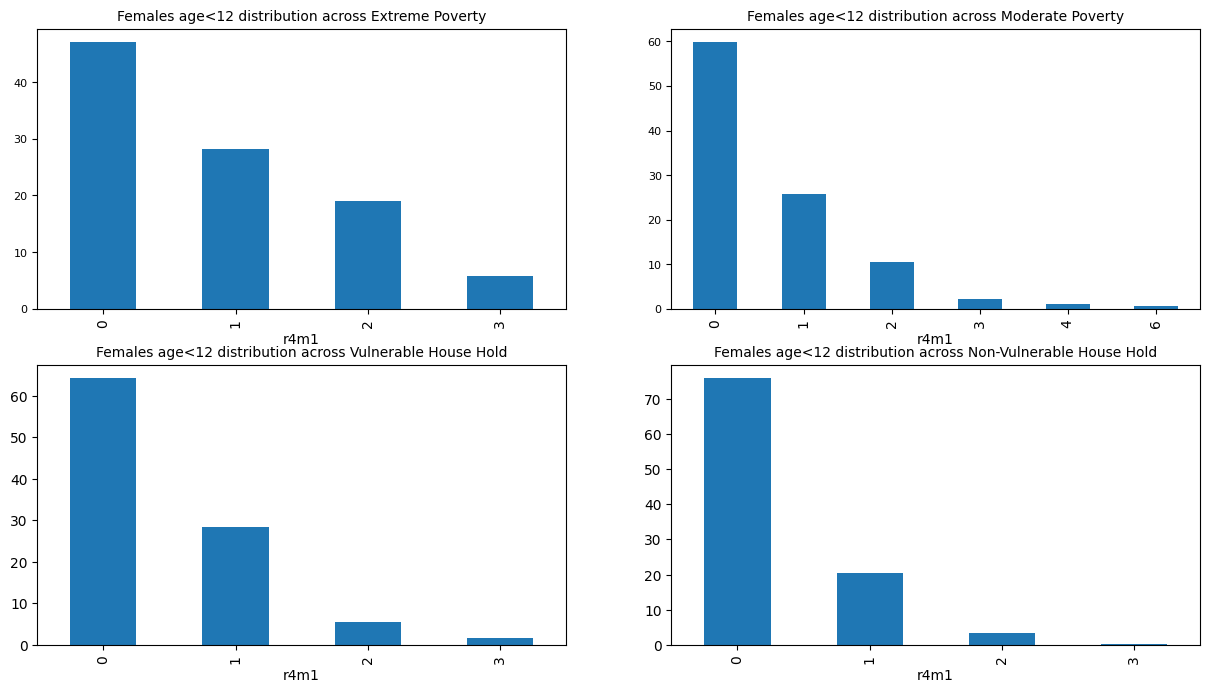

In [133]:
fig = plt.figure(figsize=(15,8))
#fig.suptitle('Continous Variable Bivariate Analysis',fontsize=10)
plt.subplot(2, 2, 1)
meles12_1['Per of pop'].plot(kind='bar')
plt.yticks(fontsize=8)
plt.xticks(fontsize=10)
plt.title("Females age<12 distribution across Extreme Poverty",fontsize=10)
plt.subplot(2, 2, 2)
meles12_2['Per of pop'].plot(kind='bar')
plt.yticks(fontsize=8)
plt.xticks(fontsize=10)
plt.title("Females age<12 distribution across Moderate Poverty",fontsize=10)
plt.subplot(2, 2, 3)
meles12_3['Per of pop'].plot(kind='bar')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title("Females age<12 distribution across Vulnerable House Hold",fontsize=10)
plt.subplot(2, 2, 4)
meles12_4['Per of pop'].plot(kind='bar')
plt.title("Females age<12 distribution across Non-Vulnerable House Hold",fontsize=10)
plt.show()

In [134]:
meles12=pd.DataFrame((income_train_df.groupby(['Target','r4t1'])['Id'].count()).reset_index())

meles12_1=meles12[meles12['Target']==1]
meles12_1.columns=['Target','r4t1','Per of pop']
meles12_1['Per of pop']=meles12_1['Per of pop'].apply(lambda x:round(x/774*100,2))
meles12_1=meles12_1.set_index('r4t1')
meles12_2=meles12[meles12['Target']==2]
meles12_2.columns=['Target','r4t1','Per of pop']
meles12_2['Per of pop']=meles12_2['Per of pop'].apply(lambda x:round(x/1558*100,2))
meles12_2=meles12_2.set_index('r4t1')

meles12_3=meles12[meles12['Target']==3]
meles12_3.columns=['Target','r4t1','Per of pop']
meles12_3['Per of pop']=meles12_3['Per of pop'].apply(lambda x:round(x/1221*100,2))
meles12_3=meles12_3.set_index('r4t1')

meles12_4=meles12[meles12['Target']==4]
meles12_4.columns=['Target','r4t1','Per of pop']
meles12_4['Per of pop']=meles12_4['Per of pop'].apply(lambda x:round(x/6004*100,2))
meles12_4=meles12_4.set_index('r4t1')

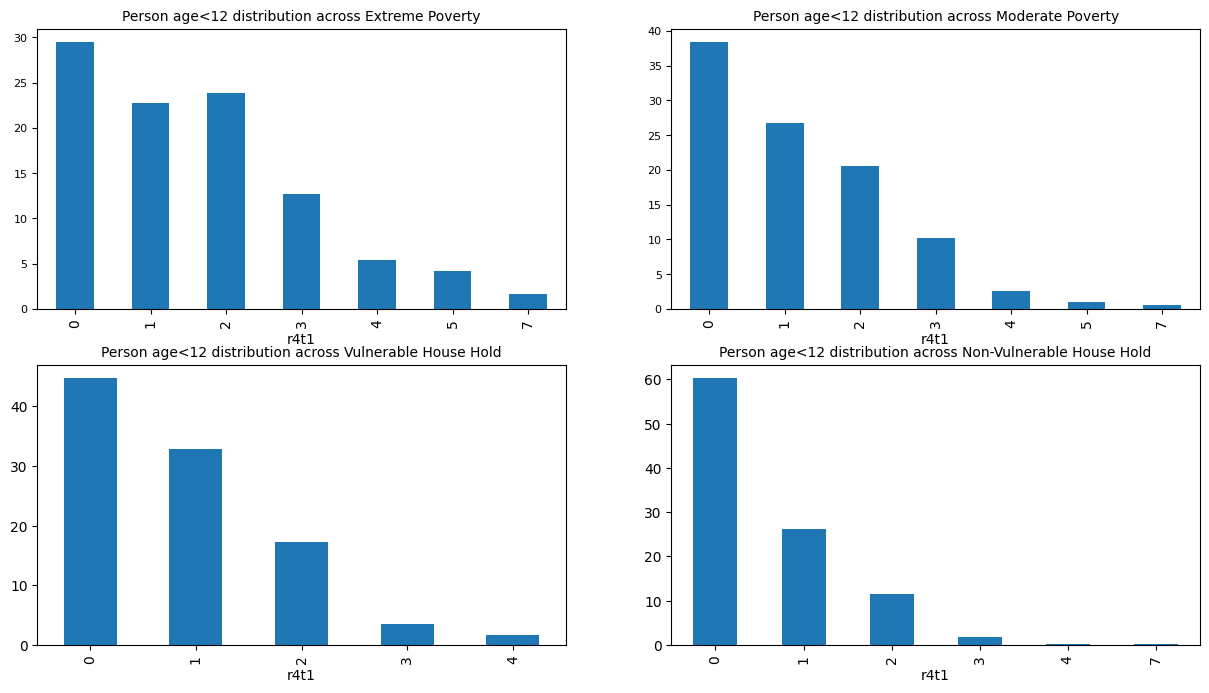

In [135]:
fig = plt.figure(figsize=(15,8))
#fig.suptitle('Continous Variable Bivariate Analysis',fontsize=10)
plt.subplot(2, 2, 1)
meles12_1['Per of pop'].plot(kind='bar')
plt.yticks(fontsize=8)
plt.xticks(fontsize=10)
plt.title("Person age<12 distribution across Extreme Poverty",fontsize=10)
plt.subplot(2, 2, 2)
meles12_2['Per of pop'].plot(kind='bar')
plt.yticks(fontsize=8)
plt.xticks(fontsize=10)
plt.title("Person age<12 distribution across Moderate Poverty",fontsize=10)
plt.subplot(2, 2, 3)
meles12_3['Per of pop'].plot(kind='bar')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title("Person age<12 distribution across Vulnerable House Hold",fontsize=10)
plt.subplot(2, 2, 4)
meles12_4['Per of pop'].plot(kind='bar')
plt.title("Person age<12 distribution across Non-Vulnerable House Hold",fontsize=10)
plt.show()

The graph shows the distribution of each level of education (escolari) by poverty level (Target). It helps to identify any patterns or relationships between education and poverty. For example, it shows higher education levels are associated with lower poverty levels or there is a higher proportion of people with low education levels in extreme poverty.

In [136]:
meles12=pd.DataFrame((income_train_df.groupby(['Target','escolari'])['Id'].count()).reset_index())

meles12_1=meles12[meles12['Target']==1]
meles12_1.columns=['Target','escolari','Per of pop']
meles12_1['Per of pop']=meles12_1['Per of pop'].apply(lambda x:round(x/774*100,2))
meles12_1=meles12_1.set_index('escolari')
meles12_2=meles12[meles12['Target']==2]
meles12_2.columns=['Target','escolari','Per of pop']
meles12_2['Per of pop']=meles12_2['Per of pop'].apply(lambda x:round(x/1558*100,2))
meles12_2=meles12_2.set_index('escolari')

meles12_3=meles12[meles12['Target']==3]
meles12_3.columns=['Target','escolari','Per of pop']
meles12_3['Per of pop']=meles12_3['Per of pop'].apply(lambda x:round(x/1221*100,2))
meles12_3=meles12_3.set_index('escolari')

meles12_4=meles12[meles12['Target']==4]
meles12_4.columns=['Target','escolari','Per of pop']
meles12_4['Per of pop']=meles12_4['Per of pop'].apply(lambda x:round(x/6004*100,2))
meles12_4=meles12_4.set_index('escolari')

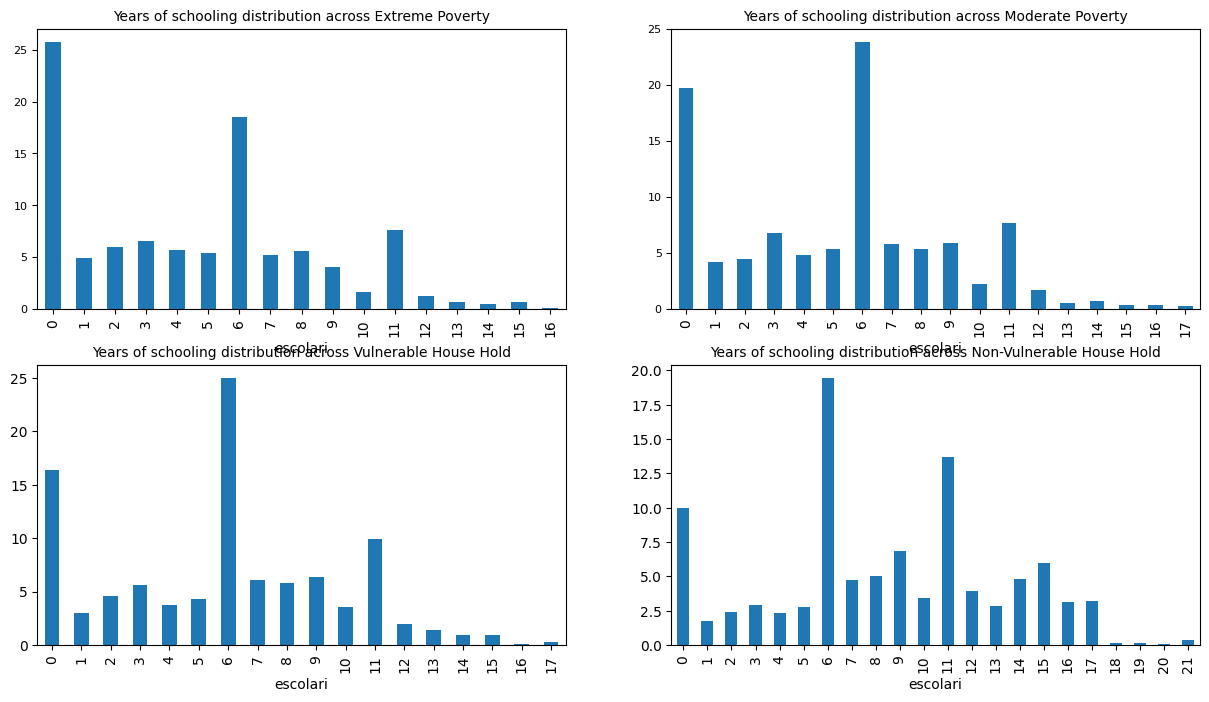

In [137]:
fig = plt.figure(figsize=(15,8))
#fig.suptitle('Continous Variable Bivariate Analysis',fontsize=10)
plt.subplot(2, 2, 1)
meles12_1['Per of pop'].plot(kind='bar')
plt.yticks(fontsize=8)
plt.xticks(fontsize=10)
plt.title("Years of schooling distribution across Extreme Poverty",fontsize=10)
plt.subplot(2, 2, 2)
meles12_2['Per of pop'].plot(kind='bar')
plt.yticks(fontsize=8)
plt.xticks(fontsize=10)
plt.title("Years of schooling distribution across Moderate Poverty",fontsize=10)
plt.subplot(2, 2, 3)
meles12_3['Per of pop'].plot(kind='bar')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title("Years of schooling distribution across Vulnerable House Hold",fontsize=10)
plt.subplot(2, 2, 4)
meles12_4['Per of pop'].plot(kind='bar')
plt.title("Years of schooling distribution across Non-Vulnerable House Hold",fontsize=10)
plt.show()

This shows the count of households in different target categories based on the number of children (hogar_nin) they have. We can infer that households with more children are more likely to belong to the extreme poverty or moderate poverty target categories, while households with no or fewer children are more likely to belong to the vulnerable or non-vulnerable categories. For example, the vulnerable and non-vulnerable categories have a higher number of households with no children compared to the non-vulnerable categories.

In [138]:
meles12=pd.DataFrame((income_train_df.groupby(['Target','hogar_nin'])['Id'].count()).reset_index())

meles12_1=meles12[meles12['Target']==1]
meles12_1.columns=['Target','hogar_nin','Per of pop']
meles12_1['Per of pop']=meles12_1['Per of pop'].apply(lambda x:round(x/774*100,2))
meles12_1=meles12_1.set_index('hogar_nin')
meles12_2=meles12[meles12['Target']==2]
meles12_2.columns=['Target','hogar_nin','Per of pop']
meles12_2['Per of pop']=meles12_2['Per of pop'].apply(lambda x:round(x/1558*100,2))
meles12_2=meles12_2.set_index('hogar_nin')

meles12_3=meles12[meles12['Target']==3]
meles12_3.columns=['Target','hogar_nin','Per of pop']
meles12_3['Per of pop']=meles12_3['Per of pop'].apply(lambda x:round(x/1221*100,2))
meles12_3=meles12_3.set_index('hogar_nin')

meles12_4=meles12[meles12['Target']==4]
meles12_4.columns=['Target','hogar_nin','Per of pop']
meles12_4['Per of pop']=meles12_4['Per of pop'].apply(lambda x:round(x/6004*100,2))
meles12_4=meles12_4.set_index('hogar_nin')

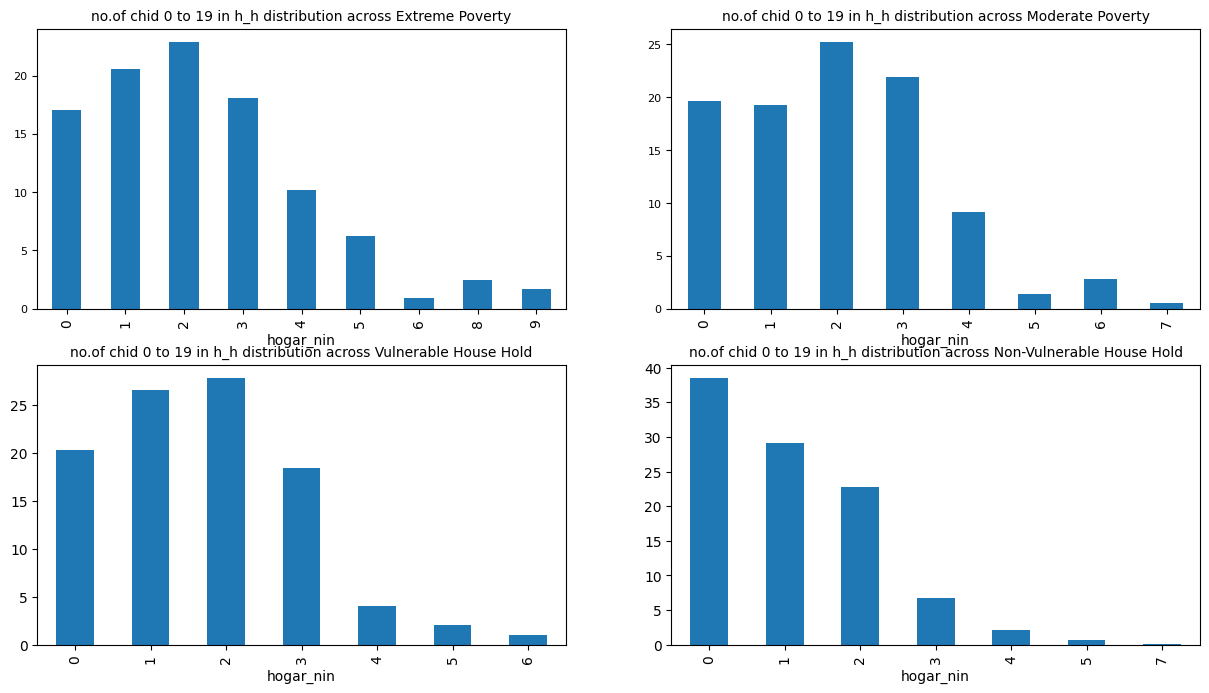

In [139]:
fig = plt.figure(figsize=(15,8))
#fig.suptitle('Continous Variable Bivariate Analysis',fontsize=10)
plt.subplot(2, 2, 1)
meles12_1['Per of pop'].plot(kind='bar')
plt.yticks(fontsize=8)
plt.xticks(fontsize=10)
plt.title("no.of chid 0 to 19 in h_h distribution across Extreme Poverty",fontsize=10)
plt.subplot(2, 2, 2)
meles12_2['Per of pop'].plot(kind='bar')
plt.yticks(fontsize=8)
plt.xticks(fontsize=10)
plt.title("no.of chid 0 to 19 in h_h distribution across Moderate Poverty",fontsize=10)
plt.subplot(2, 2, 3)
meles12_3['Per of pop'].plot(kind='bar')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title("no.of chid 0 to 19 in h_h distribution across Vulnerable House Hold",fontsize=10)
plt.subplot(2, 2, 4)
meles12_4['Per of pop'].plot(kind='bar')
plt.title("no.of chid 0 to 19 in h_h distribution across Non-Vulnerable House Hold",fontsize=10)
plt.show()

In [142]:
meles12=pd.DataFrame((income_train_df.groupby(['Target','dependency'])['Id'].count()).reset_index())

meles12_1=meles12[meles12['Target']==1]
meles12_1.columns=['Target','dependency','Per of pop']
meles12_1['Per of pop']=meles12_1['Per of pop'].apply(lambda x:round(x/774*100,2))
meles12_1=meles12_1.set_index('dependency')
meles12_2=meles12[meles12['Target']==2]
meles12_2.columns=['Target','dependency','Per of pop']
meles12_2['Per of pop']=meles12_2['Per of pop'].apply(lambda x:round(x/1558*100,2))
meles12_2=meles12_2.set_index('dependency')

meles12_3=meles12[meles12['Target']==3]
meles12_3.columns=['Target','dependency','Per of pop']
meles12_3['Per of pop']=meles12_3['Per of pop'].apply(lambda x:round(x/1221*100,2))
meles12_3=meles12_3.set_index('dependency')

meles12_4=meles12[meles12['Target']==4]
meles12_4.columns=['Target','dependency','Per of pop']
meles12_4['Per of pop']=meles12_4['Per of pop'].apply(lambda x:round(x/6004*100,2))
meles12_4=meles12_4.set_index('dependency')

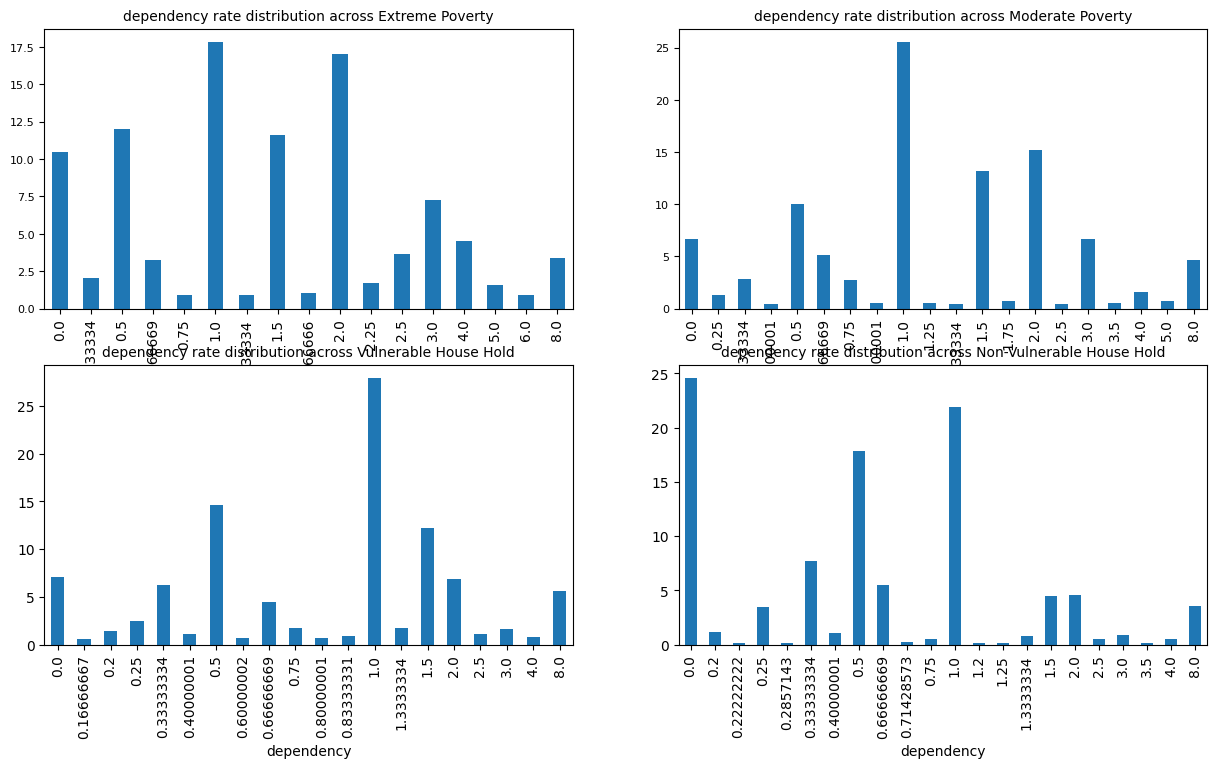

In [143]:
fig = plt.figure(figsize=(15,8))
#fig.suptitle('Continous Variable Bivariate Analysis',fontsize=10)
plt.subplot(2, 2, 1)
meles12_1['Per of pop'].plot(kind='bar')
plt.yticks(fontsize=8)
plt.xticks(fontsize=10)
plt.title("dependency rate distribution across Extreme Poverty",fontsize=10)
plt.subplot(2, 2, 2)
meles12_2['Per of pop'].plot(kind='bar')
plt.yticks(fontsize=8)
plt.xticks(fontsize=10)
plt.title("dependency rate distribution across Moderate Poverty",fontsize=10)
plt.subplot(2, 2, 3)
meles12_3['Per of pop'].plot(kind='bar')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title("dependency rate distribution across Vulnerable House Hold",fontsize=10)
plt.subplot(2, 2, 4)
meles12_4['Per of pop'].plot(kind='bar')
plt.title("dependency rate distribution across Non-Vulnerable House Hold",fontsize=10)
plt.show()

This shows the count of households in different target categories based on the  edjefe, years of education of male head of household they have. We can infer that households with more year of education of male head are more likely to belong to the vulnerable or non-vulnerable target categories, while households with no or fewer year of education of male head are more likely to belong to the extreme poverty or moderate poverty categories. 

In [144]:
meles12=pd.DataFrame((income_train_df.groupby(['Target','edjefe'])['Id'].count()).reset_index())

meles12_1=meles12[meles12['Target']==1]
meles12_1.columns=['Target','edjefe','Per of pop']
meles12_1['Per of pop']=meles12_1['Per of pop'].apply(lambda x:round(x/774*100,2))
meles12_1=meles12_1.set_index('edjefe')
meles12_2=meles12[meles12['Target']==2]
meles12_2.columns=['Target','edjefe','Per of pop']
meles12_2['Per of pop']=meles12_2['Per of pop'].apply(lambda x:round(x/1558*100,2))
meles12_2=meles12_2.set_index('edjefe')

meles12_3=meles12[meles12['Target']==3]
meles12_3.columns=['Target','edjefe','Per of pop']
meles12_3['Per of pop']=meles12_3['Per of pop'].apply(lambda x:round(x/1221*100,2))
meles12_3=meles12_3.set_index('edjefe')

meles12_4=meles12[meles12['Target']==4]
meles12_4.columns=['Target','edjefe','Per of pop']
meles12_4['Per of pop']=meles12_4['Per of pop'].apply(lambda x:round(x/6004*100,2))
meles12_4=meles12_4.set_index('edjefe')

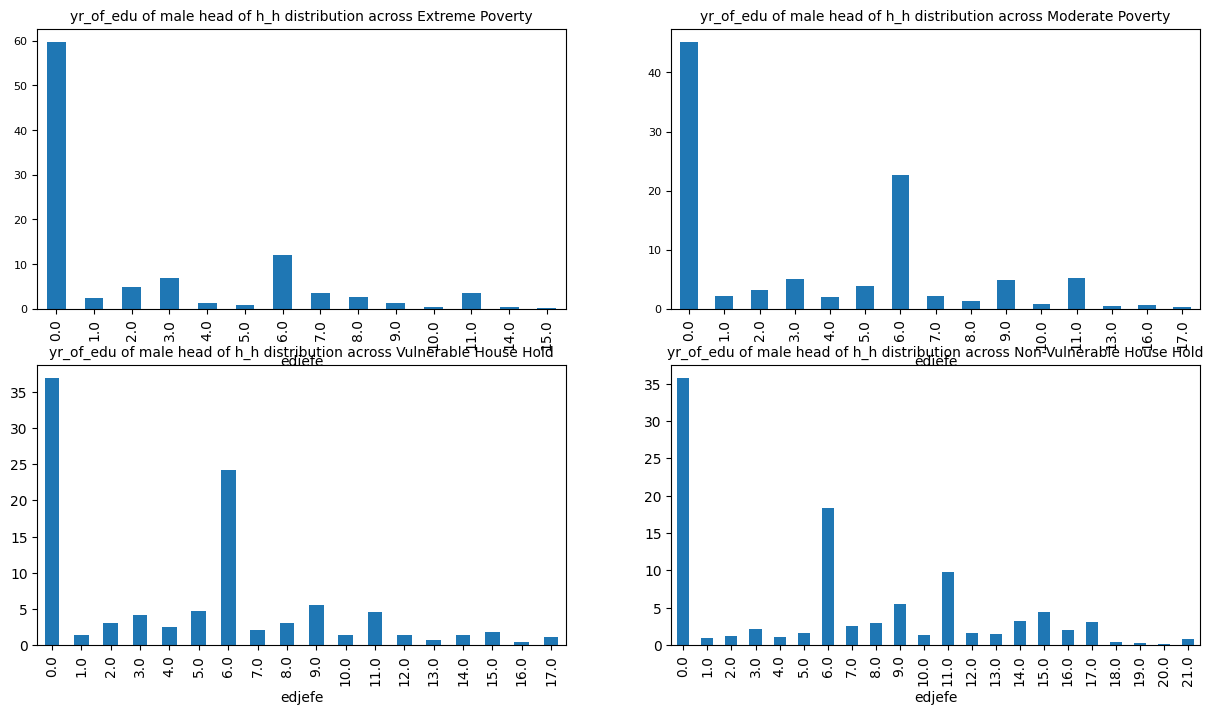

In [145]:
fig = plt.figure(figsize=(15,8))
#fig.suptitle('Continous Variable Bivariate Analysis',fontsize=10)
plt.subplot(2, 2, 1)
meles12_1['Per of pop'].plot(kind='bar')
plt.yticks(fontsize=8)
plt.xticks(fontsize=10)
plt.title("yr_of_edu of male head of h_h distribution across Extreme Poverty",fontsize=10)
plt.subplot(2, 2, 2)
meles12_2['Per of pop'].plot(kind='bar')
plt.yticks(fontsize=8)
plt.xticks(fontsize=10)
plt.title("yr_of_edu of male head of h_h distribution across Moderate Poverty",fontsize=10)
plt.subplot(2, 2, 3)
meles12_3['Per of pop'].plot(kind='bar')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title("yr_of_edu of male head of h_h distribution across Vulnerable House Hold",fontsize=10)
plt.subplot(2, 2, 4)
meles12_4['Per of pop'].plot(kind='bar')
plt.title("yr_of_edu of male head of h_h distribution across Non-Vulnerable House Hold",fontsize=10)
plt.show()

Same as edjefe this shows the count of households in different target categories based on the (edjefa) years of education of female head of household they have. We can infer that households with more year of education of female head are more likely to belong to the vulnerable or non-vulnerable household target categories, while households with no or fewer year of education of female head are more likely to belong to the extreme poverty or moderate poverty categories. 

In [146]:
meles12=pd.DataFrame((income_train_df.groupby(['Target','edjefa'])['Id'].count()).reset_index())

meles12_1=meles12[meles12['Target']==1]
meles12_1.columns=['Target','edjefa','Per of pop']
meles12_1['Per of pop']=meles12_1['Per of pop'].apply(lambda x:round(x/774*100,2))
meles12_1=meles12_1.set_index('edjefa')
meles12_2=meles12[meles12['Target']==2]
meles12_2.columns=['Target','edjefa','Per of pop']
meles12_2['Per of pop']=meles12_2['Per of pop'].apply(lambda x:round(x/1558*100,2))
meles12_2=meles12_2.set_index('edjefa')

meles12_3=meles12[meles12['Target']==3]
meles12_3.columns=['Target','edjefa','Per of pop']
meles12_3['Per of pop']=meles12_3['Per of pop'].apply(lambda x:round(x/1221*100,2))
meles12_3=meles12_3.set_index('edjefa')

meles12_4=meles12[meles12['Target']==4]
meles12_4.columns=['Target','edjefa','Per of pop']
meles12_4['Per of pop']=meles12_4['Per of pop'].apply(lambda x:round(x/6004*100,2))
meles12_4=meles12_4.set_index('edjefa')

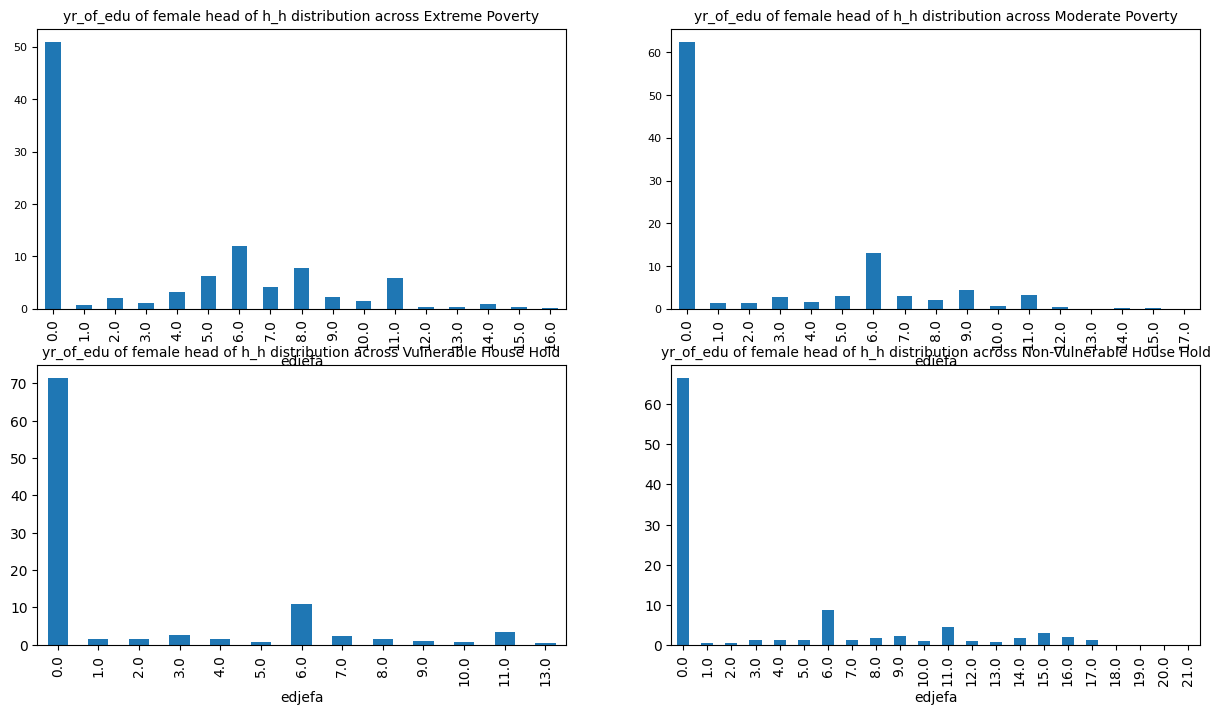

In [147]:
fig = plt.figure(figsize=(15,8))
#fig.suptitle('Continous Variable Bivariate Analysis',fontsize=10)
plt.subplot(2, 2, 1)
meles12_1['Per of pop'].plot(kind='bar')
plt.yticks(fontsize=8)
plt.xticks(fontsize=10)
plt.title("yr_of_edu of female head of h_h distribution across Extreme Poverty",fontsize=10)
plt.subplot(2, 2, 2)
meles12_2['Per of pop'].plot(kind='bar')
plt.yticks(fontsize=8)
plt.xticks(fontsize=10)
plt.title("yr_of_edu of female head of h_h distribution across Moderate Poverty",fontsize=10)
plt.subplot(2, 2, 3)
meles12_3['Per of pop'].plot(kind='bar')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title("yr_of_edu of female head of h_h distribution across Vulnerable House Hold",fontsize=10)
plt.subplot(2, 2, 4)
meles12_4['Per of pop'].plot(kind='bar')
plt.title("yr_of_edu of female head of h_h distribution across Non-Vulnerable House Hold",fontsize=10)
plt.show()

In [148]:
#grouped_df = income_train_df.groupby('Target')[select_Cols_nominal].value_counts(normalize=True).reset_index(name='Per of pop')

In [151]:
income_train_df['Target'].value_counts()

4    6004
2    1558
3    1221
1     774
Name: Target, dtype: int64

r4h1: Males younger than 12 years of age

r4m1: Females younger than 12 years of age

r4t1: persons younger than 12 years of age

escolari: years of schooling

hogar_nin: Number of children 0 to 19 in household

rez_esc: Years behind in school

dependency: Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)

edjefe: years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

edjefa: years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

In [152]:
income_train_df[select_Cols_nominal]

,r4h1,r4m1,r4t1,escolari,hogar_nin,rez_esc,dependency,edjefe,edjefa
0,0,0,0,10,0,None,0.00,10.0,0.0
1,0,0,0,12,0,None,8.00,12.0,0.0
2,0,0,0,11,0,None,8.00,0.0,11.0
3,0,1,1,9,2,None,1.00,11.0,0.0
4,0,1,1,11,2,None,1.00,11.0,0.0
...,...,...,...,...,...,...,...,...,...
9552,0,1,1,9,1,None,0.25,9.0,0.0
9553,0,1,1,0,1,None,0.25,9.0,0.0
9554,0,1,1,5,1,None,0.25,9.0,0.0
9555,0,1,1,11,1,None,0.25,9.0,0.0


In [153]:
len(yes_no_columns)

101

chi square on yes_no_columns 

We performs the chi-square test for independence between yes_no_columns(columns) and the target variable ('Target') in a given DataFrame (df).

The function compares the computed p-value with a predefined significance level (alpha=0.05). If the p-value is less than or equal to the significance level, the function prints 'Dependent (Reject H0) Variable is Significant', indicating that the categorical variable is significantly associated with the target variable. Otherwise, the function prints 'Independent (Accept H0) Variable is not Significant', indicating that the categorical variable is not significantly associated with the target variable.

This function can be used to perform hypothesis testing on the categorical variables in our dataset.
From chi-square test we select the variable which is significant(i.e, "hacdor" ,"hacapo" ,"pareddes" ,"paredfibras" ,"pisonatur" ,"pisonotiene" ,"techocane" ,"abastaguano" ,"noelec" ,"sanitario1" ,"sanitario5" ,"energcocinar1" )

In [154]:
#nominal_cols_status=
chisq(income_train_df,yes_no_columns)



**************************************************************************************************************
Dependent Variable hacdor 
 Independent Variable Target
P-Value 1.6950851807802865e-13 
 DOF 9556 
 Threshold 0.05
p value is 1.6950851807802865e-13
Dependent (Reject H0) Variable is Significant


**************************************************************************************************************
Dependent Variable hacapo 
 Independent Variable Target
P-Value 8.126047911289306e-08 
 DOF 9556 
 Threshold 0.05
p value is 8.126047911289306e-08
Dependent (Reject H0) Variable is Significant


**************************************************************************************************************
Dependent Variable v14a 
 Independent Variable Target
P-Value 1.0 
 DOF 9556 
 Threshold 0.05
p value is 1.0
Independent (Accept H0) Variable is not Significant


**************************************************************************************************************

In [155]:
selected_yes_no_cols=["hacdor" ,"hacapo" ,"pareddes" ,"paredfibras" ,"pisonatur" ,"pisonotiene" ,"techocane" ,"abastaguano" ,"noelec" ,"sanitario1" ,"sanitario5" ,"energcocinar1" ]

In [156]:
income_train_df[selected_yes_no_cols[0]]

0       0
1       0
2       0
3       0
4       0
       ..
9552    0
9553    0
9554    0
9555    0
9556    0
Name: hacdor, Length: 9557, dtype: int64

 Visually compare how the distribution of yes/no responses for each column varies between the different target groups.

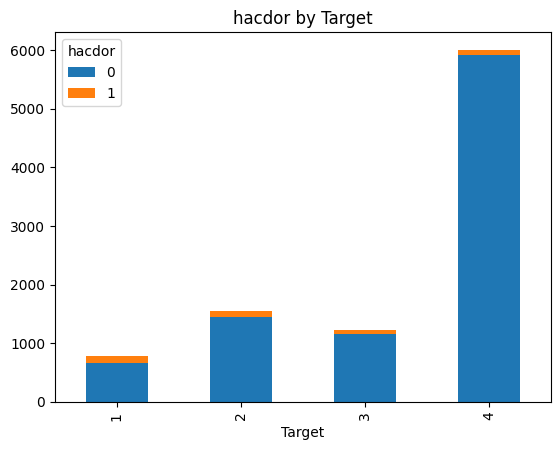

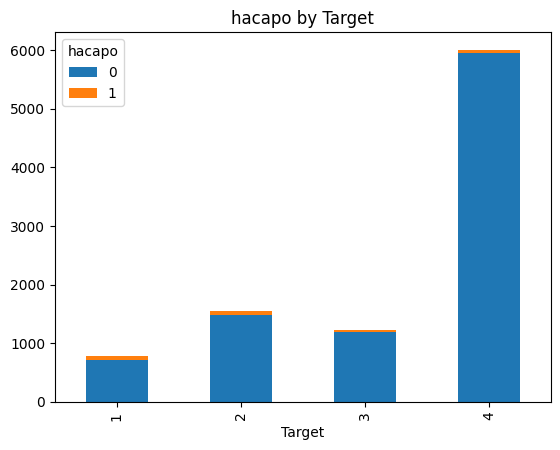

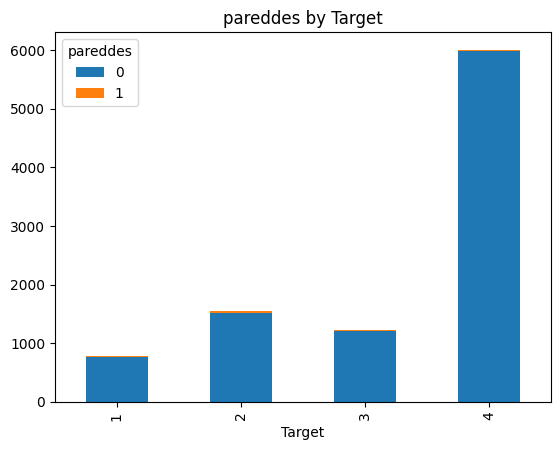

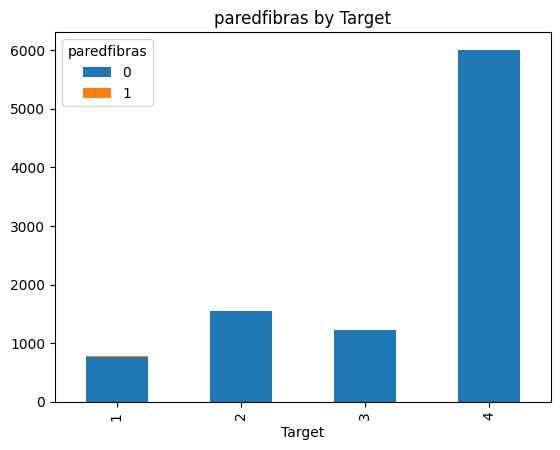

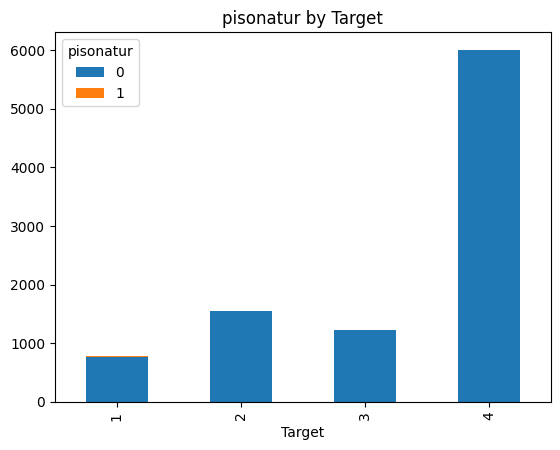

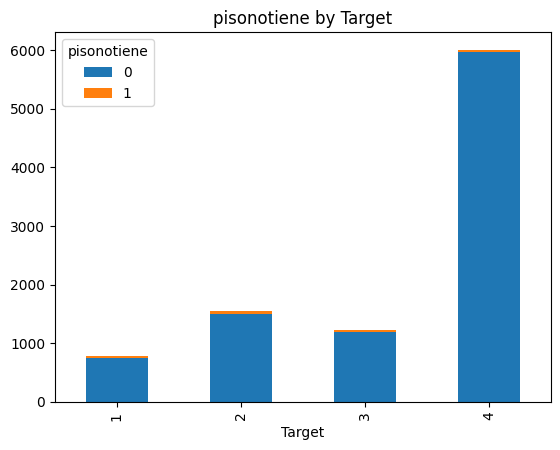

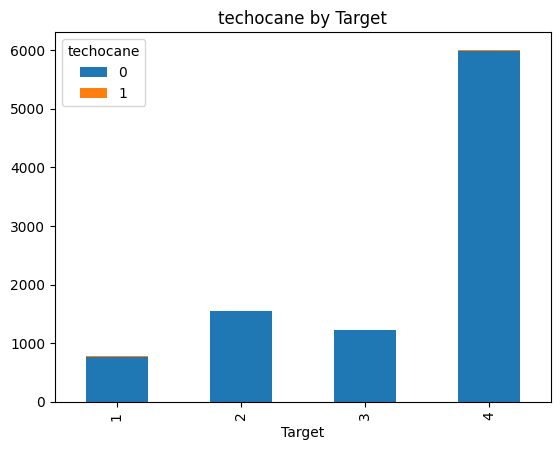

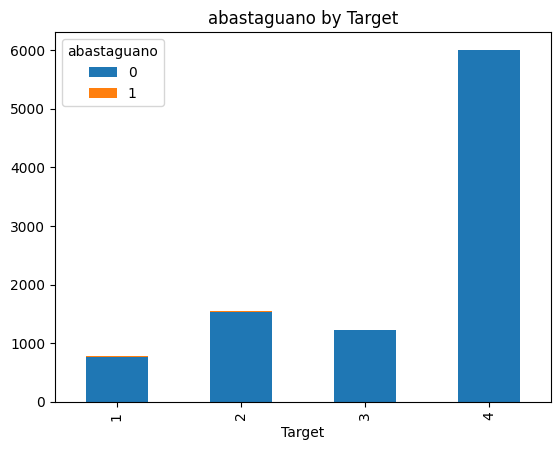

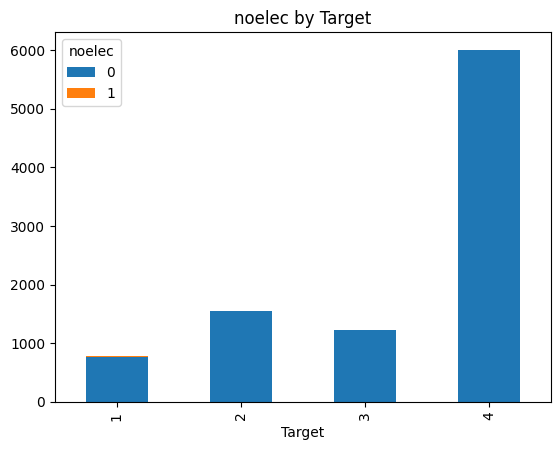

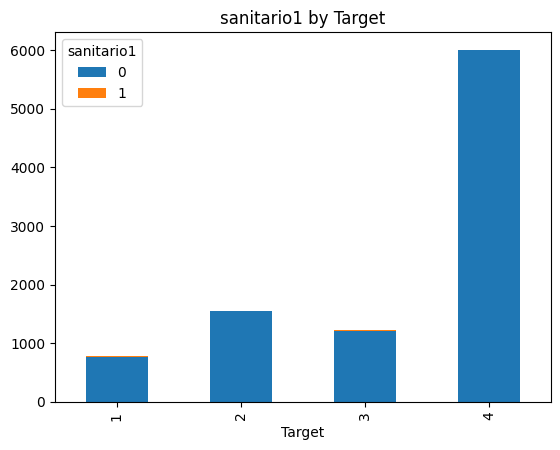

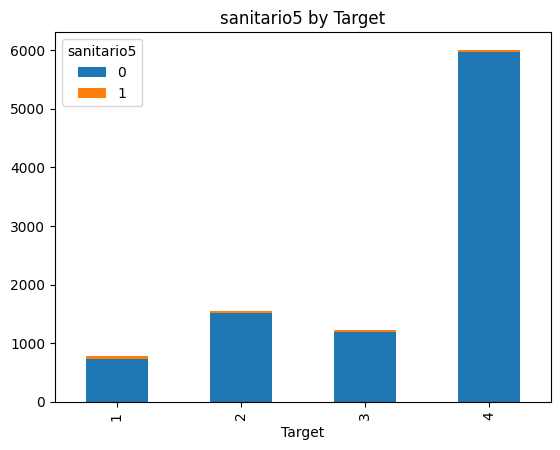

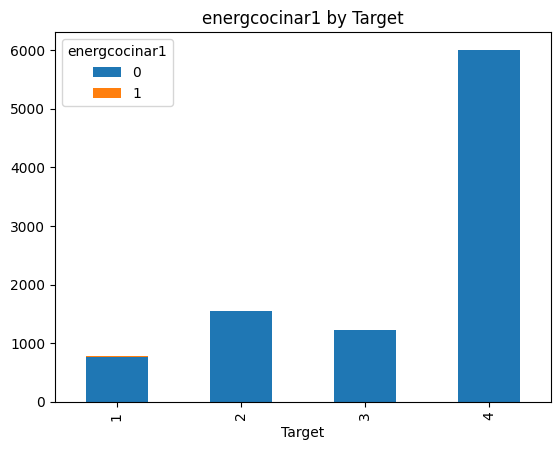

In [160]:
for col in selected_yes_no_cols:
    income_train_df.groupby(['Target', col])['Id'].count().unstack().plot(kind='bar', stacked=True)
    plt.title(f'{col} by Target')
    plt.show()